# Tutorial with satimage dataset from imbalanced learn

### Installing the library

In [1]:
#Installing algorithm files from GitHub
!pip install git+https://github.com/ZhibekZhetpisbay/NAUS_algorithm.git

  Cloning https://github.com/ZhibekZhetpisbay/NAUS_algorithm.git to c:\users\жибек\appdata\local\temp\pip-req-build-3_0wfvo8
  Resolved https://github.com/ZhibekZhetpisbay/NAUS_algorithm.git to commit c9b59f1f5be60b080c4b4e17a1b424376a0cd03d
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for NAUS_code: filename=naus_code-0.1-py3-none-any.whl size=10482 sha256=4df6a0cedb00461d3ece633d7a19f9fe4fcf6ae7abd694b0ced71588bc3ef5c2
  Stored in directory: C:\Users\Жибек\AppData\Local\Temp\pip-ephem-wheel-cache-38veic68\wheels\0d\3d\53\731fa0b4f4a5ded35fed49e6b282c46bf4e029e99f4765d5ac
Successfully built NAUS_code


  Running command git clone --filter=blob:none --quiet https://github.com/ZhibekZhetpisbay/NAUS_algorithm.git 'C:\Users\Жибек\AppData\Local\Temp\pip-req-build-3_0wfvo8'


In [2]:
#Importing an installed library
import NAUS_code

### Data Loading and Preprocessing

In [3]:
from collections import Counter
from imblearn.datasets import fetch_datasets
satimage = fetch_datasets()['satimage']
satimage.data.shape

(6435, 36)

In [4]:
import pandas as pd
import numpy as np
df = pd.DataFrame(satimage.data, columns=[f'feature_{i}' for i in range(satimage.data.shape[1])])
df['target'] = satimage.target
df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,target
0,92.0,115.0,120.0,94.0,84.0,102.0,106.0,79.0,84.0,102.0,...,104.0,88.0,121.0,128.0,100.0,84.0,107.0,113.0,87.0,-1
1,84.0,102.0,106.0,79.0,84.0,102.0,102.0,83.0,80.0,102.0,...,100.0,84.0,107.0,113.0,87.0,84.0,99.0,104.0,79.0,-1
2,84.0,102.0,102.0,83.0,80.0,102.0,102.0,79.0,84.0,94.0,...,87.0,84.0,99.0,104.0,79.0,84.0,99.0,104.0,79.0,-1
3,80.0,102.0,102.0,79.0,84.0,94.0,102.0,79.0,80.0,94.0,...,79.0,84.0,99.0,104.0,79.0,84.0,103.0,104.0,79.0,-1
4,84.0,94.0,102.0,79.0,80.0,94.0,98.0,76.0,80.0,102.0,...,79.0,84.0,103.0,104.0,79.0,79.0,107.0,109.0,87.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,60.0,83.0,96.0,85.0,64.0,87.0,100.0,88.0,64.0,83.0,...,92.0,66.0,87.0,108.0,89.0,63.0,83.0,104.0,85.0,-1
6431,64.0,79.0,100.0,85.0,56.0,71.0,96.0,85.0,56.0,68.0,...,85.0,66.0,83.0,100.0,85.0,63.0,83.0,100.0,81.0,-1
6432,56.0,68.0,91.0,81.0,56.0,64.0,91.0,81.0,53.0,64.0,...,81.0,59.0,87.0,96.0,81.0,63.0,83.0,92.0,74.0,-1
6433,56.0,68.0,87.0,74.0,60.0,71.0,91.0,81.0,60.0,64.0,...,74.0,59.0,83.0,92.0,74.0,59.0,83.0,92.0,70.0,-1


In [5]:
df['target'].value_counts()

target
-1    5809
 1     626
Name: count, dtype: int64

In [6]:
df.target.replace({-1:0},inplace=True)
df

C:\Users\Жибек\AppData\Local\Temp\ipykernel_5072\33722527.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.target.replace({-1:0},inplace=True)


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,target
0,92.0,115.0,120.0,94.0,84.0,102.0,106.0,79.0,84.0,102.0,...,104.0,88.0,121.0,128.0,100.0,84.0,107.0,113.0,87.0,0
1,84.0,102.0,106.0,79.0,84.0,102.0,102.0,83.0,80.0,102.0,...,100.0,84.0,107.0,113.0,87.0,84.0,99.0,104.0,79.0,0
2,84.0,102.0,102.0,83.0,80.0,102.0,102.0,79.0,84.0,94.0,...,87.0,84.0,99.0,104.0,79.0,84.0,99.0,104.0,79.0,0
3,80.0,102.0,102.0,79.0,84.0,94.0,102.0,79.0,80.0,94.0,...,79.0,84.0,99.0,104.0,79.0,84.0,103.0,104.0,79.0,0
4,84.0,94.0,102.0,79.0,80.0,94.0,98.0,76.0,80.0,102.0,...,79.0,84.0,103.0,104.0,79.0,79.0,107.0,109.0,87.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,60.0,83.0,96.0,85.0,64.0,87.0,100.0,88.0,64.0,83.0,...,92.0,66.0,87.0,108.0,89.0,63.0,83.0,104.0,85.0,0
6431,64.0,79.0,100.0,85.0,56.0,71.0,96.0,85.0,56.0,68.0,...,85.0,66.0,83.0,100.0,85.0,63.0,83.0,100.0,81.0,0
6432,56.0,68.0,91.0,81.0,56.0,64.0,91.0,81.0,53.0,64.0,...,81.0,59.0,87.0,96.0,81.0,63.0,83.0,92.0,74.0,0
6433,56.0,68.0,87.0,74.0,60.0,71.0,91.0,81.0,60.0,64.0,...,74.0,59.0,83.0,92.0,74.0,59.0,83.0,92.0,70.0,0


### Application of the NAUS Algorithm

C:\conda\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


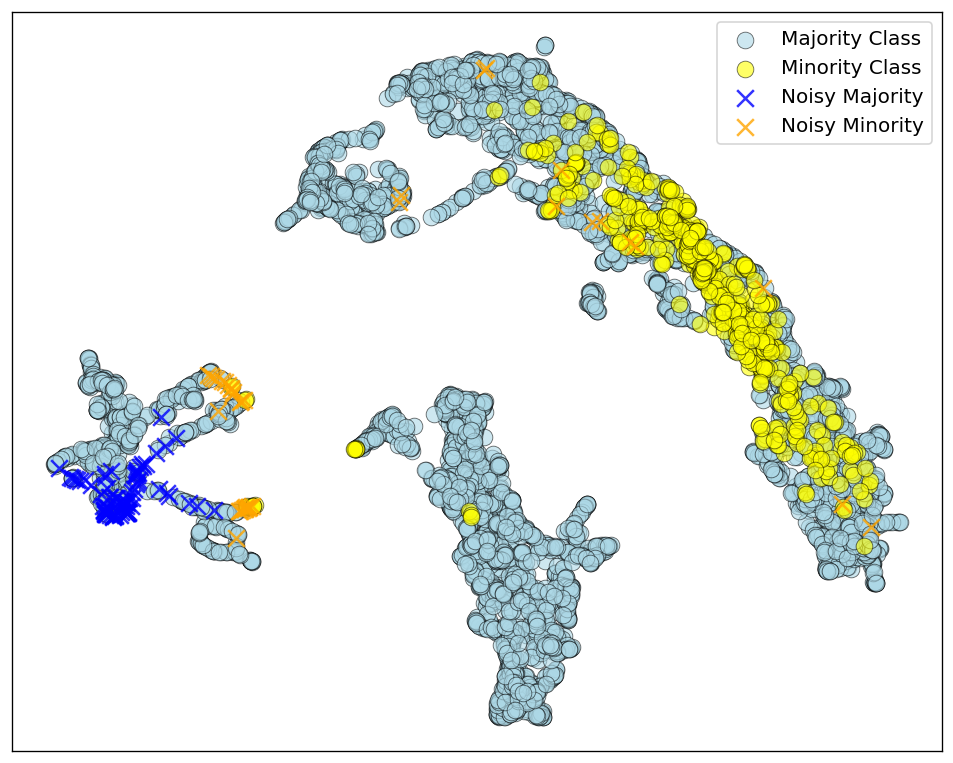

C:\conda\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


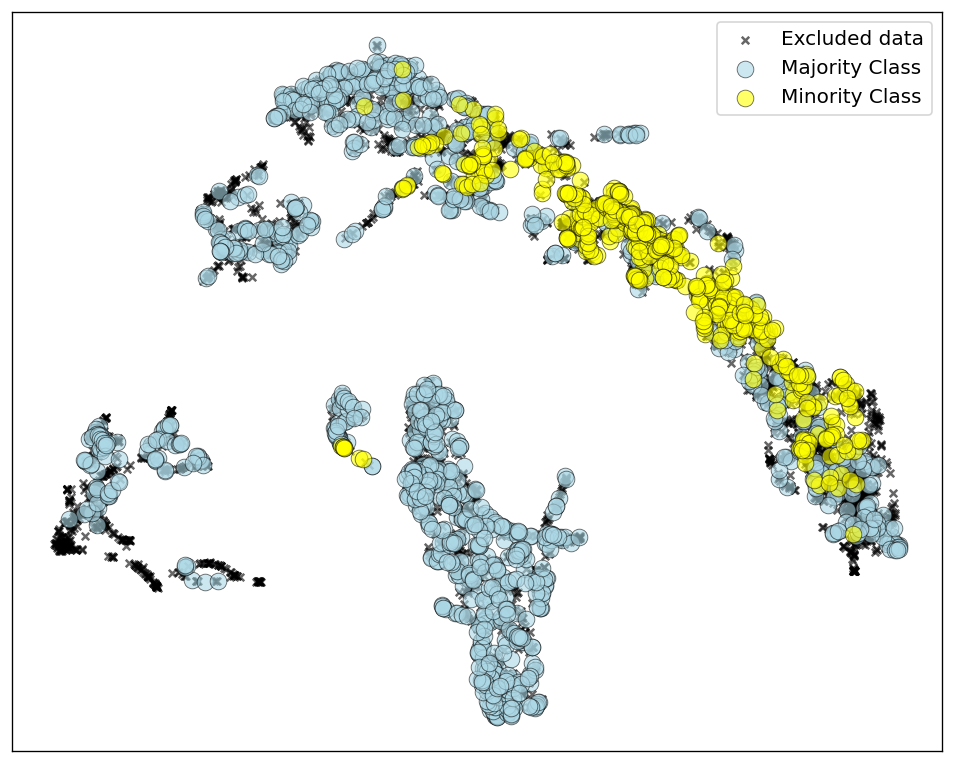

In [7]:
features = df.columns.drop("target")
processor = NAUS_code.DataProcessor(df, class_col="target", feature_cols=features)

# Step 1: Calculate posterior probabilities
processor.calculate_posterior_probabilities()

# Step 2: Apply TACF for noise removal
processor.compute_tacf(threshold_type='std', threshold_value=3, min_features=2)
processor.visualize(title="UMAP Projection After Noise Removal",mode ='noise')
# Step 3: Undersample the majority class
result = processor.undersample(maj_class=0, gamma=1.0, ratio=0.5)

# Step 4: Visualize the results
processor.visualize(title="UMAP Projection After Undersampling", mode='undersampling')

In [8]:
# Class Ratio in the Final Dataset
result['target'].value_counts()

target
0    1172
1     586
Name: count, dtype: int64

In [9]:
# Removal of Redundant Features Generated During Computation
result = result.iloc[:,:-3]
df=df.iloc[:,:-3]
result

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,target
4975,60.0,61.0,71.0,59.0,60.0,61.0,75.0,63.0,60.0,61.0,...,70.0,59.0,60.0,84.0,70.0,59.0,56.0,80.0,70.0,0
4976,60.0,61.0,75.0,67.0,60.0,57.0,75.0,67.0,56.0,54.0,...,70.0,59.0,60.0,80.0,63.0,66.0,63.0,76.0,66.0,0
4977,53.0,48.0,67.0,56.0,56.0,54.0,79.0,63.0,56.0,54.0,...,52.0,56.0,46.0,69.0,52.0,56.0,49.0,69.0,55.0,0
4978,56.0,54.0,79.0,63.0,56.0,54.0,79.0,63.0,56.0,51.0,...,52.0,56.0,49.0,69.0,55.0,56.0,53.0,73.0,63.0,0
4979,53.0,54.0,71.0,52.0,53.0,51.0,75.0,63.0,53.0,48.0,...,59.0,52.0,49.0,76.0,59.0,56.0,53.0,84.0,63.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6246,76.0,85.0,98.0,76.0,72.0,81.0,86.0,72.0,68.0,73.0,...,79.0,79.0,95.0,96.0,79.0,75.0,87.0,93.0,79.0,1
6268,80.0,95.0,100.0,81.0,71.0,79.0,91.0,74.0,68.0,71.0,...,78.0,74.0,91.0,100.0,81.0,78.0,96.0,96.0,81.0,1
6360,67.0,77.0,110.0,90.0,75.0,91.0,97.0,79.0,79.0,91.0,...,94.0,76.0,89.0,106.0,87.0,76.0,89.0,98.0,79.0,1
6361,75.0,91.0,97.0,79.0,79.0,91.0,97.0,83.0,79.0,91.0,...,87.0,76.0,89.0,98.0,79.0,72.0,89.0,98.0,79.0,1


### Model Training

In [10]:
train = NAUS_code.ModelTraining()
# Random forest on original data
Before_rndf=train.rndf_weights(df,58,4,0,'original',2)

Training set:
target
0    5751
1     568
Name: count, dtype: int64

Test set:
target
0    58
1    58
Name: count, dtype: int64
Fold 1 - Accuracy: 0.8858, AUC: 0.9467, Precision: 0.4301, Recall: 0.8345
Fold 2 - Accuracy: 0.8987, AUC: 0.9406, Precision: 0.4620, Recall: 0.7711

Test Data Evaluation - Accuracy: 0.8534, AUC: 0.9560, Precision: 0.9020, Recall: 0.7931


In [11]:
# Random forest on undersampled with NAUS data
NAUS_rndf=train.rndf_weights(result,58,4,0,'undersampled',2)

Training set:
target
0    1114
1     528
Name: count, dtype: int64

Test set:
target
0    58
1    58
Name: count, dtype: int64
Fold 1 - Accuracy: 0.9050, AUC: 0.9719, Precision: 0.8661, Recall: 0.8333
Fold 2 - Accuracy: 0.9111, AUC: 0.9750, Precision: 0.8631, Recall: 0.8598

Test Data Evaluation - Accuracy: 0.9569, AUC: 0.9837, Precision: 0.9649, Recall: 0.9483


In [12]:
# LightGBM on original data
Before_lgbm=train.lgbm_weights(df,58,4,15,'original',2)

Training set:
target
0    5751
1     568
Name: count, dtype: int64

Test set:
target
0    58
1    58
Name: count, dtype: int64
Training until validation scores don't improve for 10 rounds
[10]	training's binary_logloss: 0.146908	valid_1's binary_logloss: 0.196229
[20]	training's binary_logloss: 0.114342	valid_1's binary_logloss: 0.185475
[30]	training's binary_logloss: 0.0848781	valid_1's binary_logloss: 0.174255
[40]	training's binary_logloss: 0.0621571	valid_1's binary_logloss: 0.167145
[50]	training's binary_logloss: 0.0435243	valid_1's binary_logloss: 0.159296
[60]	training's binary_logloss: 0.0310029	valid_1's binary_logloss: 0.15562
[70]	training's binary_logloss: 0.0219132	valid_1's binary_logloss: 0.153591
[80]	training's binary_logloss: 0.0158848	valid_1's binary_logloss: 0.153376
Early stopping, best iteration is:
[79]	training's binary_logloss: 0.0164194	valid_1's binary_logloss: 0.153085
Fold 1 - Accuracy: 0.9386, AUC: 0.9573, Precision: 0.6471, Recall: 0.6972
Training unti

In [13]:
# LightGBM on undersampled with NAUS data
NAUS_lgbm=train.lgbm_weights(result,58,4,15,'undersampled',2)

Training set:
target
0    1114
1     528
Name: count, dtype: int64

Test set:
target
0    58
1    58
Name: count, dtype: int64
Training until validation scores don't improve for 10 rounds
[10]	training's binary_logloss: 0.266969	valid_1's binary_logloss: 0.308937
[20]	training's binary_logloss: 0.14583	valid_1's binary_logloss: 0.219829
[30]	training's binary_logloss: 0.0892844	valid_1's binary_logloss: 0.189944
[40]	training's binary_logloss: 0.0524591	valid_1's binary_logloss: 0.175067
[50]	training's binary_logloss: 0.0307887	valid_1's binary_logloss: 0.170682
[60]	training's binary_logloss: 0.0181035	valid_1's binary_logloss: 0.16987
Early stopping, best iteration is:
[57]	training's binary_logloss: 0.0213874	valid_1's binary_logloss: 0.168116
Fold 1 - Accuracy: 0.9342, AUC: 0.9812, Precision: 0.8860, Recall: 0.9129
Training until validation scores don't improve for 10 rounds
[10]	training's binary_logloss: 0.265983	valid_1's binary_logloss: 0.313462
[20]	training's binary_logloss:

In [14]:
# MLP on original data
Before_mlp=train.mlp_weight(df,58,28,42)

Training set:
target
0    5751
1     568
Name: count, dtype: int64

Test set:
target
0    58
1    58
Name: count, dtype: int64


C:\conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Fold 1 - Accuracy: 0.9101, AUC: 0.8070, Precision: 0.0000, Recall: 0.0000
Fold 2 - Accuracy: 0.9101, AUC: 0.8104, Precision: 0.0000, Recall: 0.0000

Test Data Evaluation - Accuracy: 0.5000, AUC: 0.8029, Precision: 0.0000, Recall: 0.0000


C:\conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
# MLP on undersampled with NAUS data
NAUS_mlp=train.mlp_weight(result,58,28,42)

Training set:
target
0    1114
1     528
Name: count, dtype: int64

Test set:
target
0    58
1    58
Name: count, dtype: int64
Fold 1 - Accuracy: 0.6931, AUC: 0.7973, Precision: 0.5769, Recall: 0.1705
Fold 2 - Accuracy: 0.7942, AUC: 0.8621, Precision: 0.6179, Recall: 0.9432

Test Data Evaluation - Accuracy: 0.8879, AUC: 0.9275, Precision: 0.8358, Recall: 0.9655


## Results Using the Same Parameters on Alternative Algorithms

### SMOTE

In [16]:
#SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(df.iloc[:,:-1], df.iloc[:,-1])
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 5809, 1: 5809})


In [17]:
data_new_smote = X_res
data_new_smote['target']=y_res
data_new_smote

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,target
0,92.000000,115.000000,120.000000,94.000000,84.000000,102.000000,106.000000,79.000000,84.000000,102.000000,...,104.000000,88.000000,121.000000,128.000000,100.000000,84.000000,107.000000,113.000000,87.000000,0
1,84.000000,102.000000,106.000000,79.000000,84.000000,102.000000,102.000000,83.000000,80.000000,102.000000,...,100.000000,84.000000,107.000000,113.000000,87.000000,84.000000,99.000000,104.000000,79.000000,0
2,84.000000,102.000000,102.000000,83.000000,80.000000,102.000000,102.000000,79.000000,84.000000,94.000000,...,87.000000,84.000000,99.000000,104.000000,79.000000,84.000000,99.000000,104.000000,79.000000,0
3,80.000000,102.000000,102.000000,79.000000,84.000000,94.000000,102.000000,79.000000,80.000000,94.000000,...,79.000000,84.000000,99.000000,104.000000,79.000000,84.000000,103.000000,104.000000,79.000000,0
4,84.000000,94.000000,102.000000,79.000000,80.000000,94.000000,98.000000,76.000000,80.000000,102.000000,...,79.000000,84.000000,103.000000,104.000000,79.000000,79.000000,107.000000,109.000000,87.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11613,70.402712,79.805423,84.027116,68.416270,70.402712,79.805423,80.805423,69.624405,70.402712,83.402712,...,72.597288,69.194577,82.791865,87.791865,72.778307,73.194577,86.791865,87.791865,70.986442,1
11614,81.995933,87.010844,96.000000,77.995933,82.002711,95.998644,100.000000,78.001356,82.002711,95.998644,...,69.004067,78.001356,97.002711,101.000000,82.994578,82.001356,102.001356,109.993222,86.994578,1
11615,66.011643,81.000000,86.000000,69.988357,70.011643,83.011643,86.000000,68.000000,72.000000,87.011643,...,71.000000,71.000000,79.000000,88.976714,68.988357,71.000000,73.467982,80.976714,64.485447,1
11616,78.000000,87.000000,87.011236,70.000000,77.011236,87.000000,88.000000,69.011236,77.011236,87.000000,...,69.988764,78.000000,91.011236,96.011236,73.000000,78.988764,92.000000,93.000000,73.000000,1


In [18]:
#SMOTE
SMOTE_rndf=train.rndf_overs1(data_new_smote,len(data_new_smote)-len(df),58,4,34)

Training set:
target
0    5751
1     568
Name: count, dtype: int64

Test set:
target
0    58
1    58
Name: count, dtype: int64
Fold 1 - Accuracy: 0.9317, AUC: 0.9795, Precision: 0.8983, Recall: 0.9736
Fold 2 - Accuracy: 0.9291, AUC: 0.9762, Precision: 0.8991, Recall: 0.9666

Test Data Evaluation - Accuracy: 0.9224, AUC: 0.9584, Precision: 0.9016, Recall: 0.9483


In [19]:
#SMOTE
SMOTE_lgbm=train.lgbm_overs1(data_new_smote,len(data_new_smote)-len(df),58,4,15)

Training set:
target
0    5751
1     568
Name: count, dtype: int64

Test set:
target
0    58
1    58
Name: count, dtype: int64
Training until validation scores don't improve for 10 rounds
[10]	training's binary_logloss: 0.299177	valid_1's binary_logloss: 0.31789
[20]	training's binary_logloss: 0.171694	valid_1's binary_logloss: 0.204699
[30]	training's binary_logloss: 0.107409	valid_1's binary_logloss: 0.151506
[40]	training's binary_logloss: 0.0717834	valid_1's binary_logloss: 0.122631
[50]	training's binary_logloss: 0.0498749	valid_1's binary_logloss: 0.104968
[60]	training's binary_logloss: 0.0357602	valid_1's binary_logloss: 0.0931582
[70]	training's binary_logloss: 0.0261911	valid_1's binary_logloss: 0.084782
[80]	training's binary_logloss: 0.0193244	valid_1's binary_logloss: 0.0787936
[90]	training's binary_logloss: 0.014376	valid_1's binary_logloss: 0.0745254
[100]	training's binary_logloss: 0.0110398	valid_1's binary_logloss: 0.071943
Did not meet early stopping. Best iteration

In [20]:
#SMOTE
SMOTE_mlp=train.mlp_overs1(data_new_smote,len(data_new_smote)-len(df),58,28,42)

Training set:
target
0    5751
1     568
Name: count, dtype: int64

Test set:
target
0    58
1    58
Name: count, dtype: int64
Fold 1 - Accuracy: 0.8247, AUC: 0.8879, Precision: 0.7711, Recall: 0.9235
Fold 2 - Accuracy: 0.8058, AUC: 0.8919, Precision: 0.7432, Recall: 0.9346

Test Data Evaluation - Accuracy: 0.8017, AUC: 0.9236, Precision: 0.7465, Recall: 0.9138


### ADASYN

In [21]:
#Adasyn
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(df.iloc[:,:-1], df.iloc[:,-1])
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 5809, 1: 5736})


In [22]:
data_new_ada = X_res
data_new_ada['target']=y_res
data_new_ada

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,target
0,92.000000,115.000000,120.000000,94.000000,84.000000,102.000000,106.000000,79.000000,84.000000,102.000000,...,104.000000,88.000000,121.000000,128.000000,100.000000,84.000000,107.000000,113.000000,87.000000,0
1,84.000000,102.000000,106.000000,79.000000,84.000000,102.000000,102.000000,83.000000,80.000000,102.000000,...,100.000000,84.000000,107.000000,113.000000,87.000000,84.000000,99.000000,104.000000,79.000000,0
2,84.000000,102.000000,102.000000,83.000000,80.000000,102.000000,102.000000,79.000000,84.000000,94.000000,...,87.000000,84.000000,99.000000,104.000000,79.000000,84.000000,99.000000,104.000000,79.000000,0
3,80.000000,102.000000,102.000000,79.000000,84.000000,94.000000,102.000000,79.000000,80.000000,94.000000,...,79.000000,84.000000,99.000000,104.000000,79.000000,84.000000,103.000000,104.000000,79.000000,0
4,84.000000,94.000000,102.000000,79.000000,80.000000,94.000000,98.000000,76.000000,80.000000,102.000000,...,79.000000,84.000000,103.000000,104.000000,79.000000,79.000000,107.000000,109.000000,87.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11540,66.974292,76.965723,109.931446,90.034277,75.008569,90.982862,97.077123,79.068554,78.974292,90.982862,...,93.982862,75.991431,89.085692,105.982862,86.965723,75.991431,89.051415,98.017138,79.000000,1
11541,67.143399,76.904401,109.713202,89.761001,74.952200,90.808801,96.761001,78.952200,78.761001,91.000000,...,93.808801,75.904401,88.952200,105.952200,86.808801,75.904401,89.143399,98.143399,79.047800,1
11542,66.425520,76.234026,108.468053,90.765974,75.191493,90.617013,98.723441,80.531947,78.425520,90.617013,...,93.617013,75.808507,90.914934,105.617013,86.234026,75.808507,90.148960,98.382987,79.000000,1
11543,67.000000,76.665397,109.163493,90.000000,74.832699,90.498096,98.338411,79.669206,78.163493,91.167301,...,94.334603,75.163493,88.665397,106.334603,87.167301,75.163493,89.334603,98.334603,79.334603,1


In [23]:
#Adasyn
Adasyn_rndf=train.rndf_overs1(data_new_ada,len(data_new_ada)-len(df),58,4,34)

Training set:
target
0    5751
1     568
Name: count, dtype: int64

Test set:
target
0    58
1    58
Name: count, dtype: int64
Fold 1 - Accuracy: 0.9185, AUC: 0.9647, Precision: 0.8632, Recall: 0.9933
Fold 2 - Accuracy: 0.9109, AUC: 0.9598, Precision: 0.8554, Recall: 0.9877

Test Data Evaluation - Accuracy: 0.9052, AUC: 0.9478, Precision: 0.8406, Recall: 1.0000


In [24]:
#Adasyn
Adasyn_lgbm=train.lgbm_overs1(data_new_ada,len(data_new_ada)-len(df),58,4,15)

Training set:
target
0    5751
1     568
Name: count, dtype: int64

Test set:
target
0    58
1    58
Name: count, dtype: int64
Training until validation scores don't improve for 10 rounds
[10]	training's binary_logloss: 0.317443	valid_1's binary_logloss: 0.338337
[20]	training's binary_logloss: 0.188757	valid_1's binary_logloss: 0.220598
[30]	training's binary_logloss: 0.120871	valid_1's binary_logloss: 0.162784
[40]	training's binary_logloss: 0.082612	valid_1's binary_logloss: 0.129475
[50]	training's binary_logloss: 0.0588997	valid_1's binary_logloss: 0.10919
[60]	training's binary_logloss: 0.0429219	valid_1's binary_logloss: 0.0948388
[70]	training's binary_logloss: 0.0321093	valid_1's binary_logloss: 0.0861219
[80]	training's binary_logloss: 0.0239531	valid_1's binary_logloss: 0.0788716
[90]	training's binary_logloss: 0.0182512	valid_1's binary_logloss: 0.0747522
[100]	training's binary_logloss: 0.0140577	valid_1's binary_logloss: 0.0708593
Did not meet early stopping. Best iterati

In [25]:
#ADASYN
Adasyn_mlp=train.mlp_overs1(data_new_ada,len(data_new_ada)-len(df),58,28,42)

Training set:
target
0    5751
1     568
Name: count, dtype: int64

Test set:
target
0    58
1    58
Name: count, dtype: int64
Fold 1 - Accuracy: 0.8198, AUC: 0.8480, Precision: 0.7581, Recall: 0.9359
Fold 2 - Accuracy: 0.8112, AUC: 0.8580, Precision: 0.7390, Recall: 0.9584

Test Data Evaluation - Accuracy: 0.7845, AUC: 0.8600, Precision: 0.7143, Recall: 0.9483


### LoRAS

In [26]:
import pandas as pd
from collections import Counter
from pyloras import LORAS
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Применяем LoRAS
loras = LORAS(n_neighbors=5, random_state=42)
X_res, y_res = loras.fit_resample(X, y)

print('Исходное распределение классов:', Counter(y))
print('После применения LoRAS:', Counter(y_res))
# Преобразуем X_res в DataFrame
data_new_loras = pd.DataFrame(X_res, columns=df.columns[:-1])

# Добавим столбец с метками
data_new_loras['target'] = y_res

# Показываем результат
data_new_loras.head()

Исходное распределение классов: Counter({0: 5809, 1: 626})
После применения LoRAS: Counter({0: 5809, 1: 5809})


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,target
0,92.0,115.0,120.0,94.0,84.0,102.0,106.0,79.0,84.0,102.0,...,104.0,88.0,121.0,128.0,100.0,84.0,107.0,113.0,87.0,0
1,84.0,102.0,106.0,79.0,84.0,102.0,102.0,83.0,80.0,102.0,...,100.0,84.0,107.0,113.0,87.0,84.0,99.0,104.0,79.0,0
2,84.0,102.0,102.0,83.0,80.0,102.0,102.0,79.0,84.0,94.0,...,87.0,84.0,99.0,104.0,79.0,84.0,99.0,104.0,79.0,0
3,80.0,102.0,102.0,79.0,84.0,94.0,102.0,79.0,80.0,94.0,...,79.0,84.0,99.0,104.0,79.0,84.0,103.0,104.0,79.0,0
4,84.0,94.0,102.0,79.0,80.0,94.0,98.0,76.0,80.0,102.0,...,79.0,84.0,103.0,104.0,79.0,79.0,107.0,109.0,87.0,0


In [27]:
#LoRAS
LoRAS_rndf=train.rndf_overs1(data_new_loras,len(data_new_loras)-len(df),58,4,34)

Training set:
target
0    5751
1     568
Name: count, dtype: int64

Test set:
target
0    58
1    58
Name: count, dtype: int64
Fold 1 - Accuracy: 0.9473, AUC: 0.9878, Precision: 0.9214, Recall: 0.9781
Fold 2 - Accuracy: 0.9452, AUC: 0.9871, Precision: 0.9170, Recall: 0.9791

Test Data Evaluation - Accuracy: 0.8879, AUC: 0.9587, Precision: 0.9091, Recall: 0.8621


In [28]:
#LoRAS
LoRAS_lgbm=train.lgbm_overs1(data_new_loras,len(data_new_loras)-len(df),58,4,15)

Training set:
target
0    5751
1     568
Name: count, dtype: int64

Test set:
target
0    58
1    58
Name: count, dtype: int64
Training until validation scores don't improve for 10 rounds
[10]	training's binary_logloss: 0.271167	valid_1's binary_logloss: 0.288312
[20]	training's binary_logloss: 0.141697	valid_1's binary_logloss: 0.167825
[30]	training's binary_logloss: 0.081278	valid_1's binary_logloss: 0.118522
[40]	training's binary_logloss: 0.0501565	valid_1's binary_logloss: 0.0949599
[50]	training's binary_logloss: 0.0329687	valid_1's binary_logloss: 0.0841019
[60]	training's binary_logloss: 0.0227046	valid_1's binary_logloss: 0.0778644
[70]	training's binary_logloss: 0.015961	valid_1's binary_logloss: 0.0747554
[80]	training's binary_logloss: 0.0115519	valid_1's binary_logloss: 0.0730877
[90]	training's binary_logloss: 0.00826104	valid_1's binary_logloss: 0.0707027
[100]	training's binary_logloss: 0.00610732	valid_1's binary_logloss: 0.0710906
Did not meet early stopping. Best it

In [29]:
#LoRAS
LoRAS_mlp=train.mlp_overs1(data_new_loras,len(data_new_loras)-len(df),58,28,42)

Training set:
target
0    5751
1     568
Name: count, dtype: int64

Test set:
target
0    58
1    58
Name: count, dtype: int64
Fold 1 - Accuracy: 0.8317, AUC: 0.9044, Precision: 0.7703, Recall: 0.9450
Fold 2 - Accuracy: 0.8336, AUC: 0.8968, Precision: 0.7663, Recall: 0.9600

Test Data Evaluation - Accuracy: 0.8276, AUC: 0.9159, Precision: 0.7879, Recall: 0.8966


### Random Undersampling

In [30]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(df.iloc[:,:-1], df.iloc[:,-1])
data_new = X_resampled
data_new['target']=y_resampled
#RUS
RUS_rndf=train.rndf_weights(data_new,58,4,34,'undersampled',2)

Training set:
target
0    568
1    568
Name: count, dtype: int64

Test set:
target
0    58
1    58
Name: count, dtype: int64
Fold 1 - Accuracy: 0.8732, AUC: 0.9510, Precision: 0.8897, Recall: 0.8521
Fold 2 - Accuracy: 0.8539, AUC: 0.9256, Precision: 0.8252, Recall: 0.8979

Test Data Evaluation - Accuracy: 0.8534, AUC: 0.9159, Precision: 0.8060, Recall: 0.9310


In [31]:
#RUS
RUS_lgbm=train.lgbm_weights(data_new,58,4,15,'undersampled',2)

Training set:
target
0    568
1    568
Name: count, dtype: int64

Test set:
target
0    58
1    58
Name: count, dtype: int64
Training until validation scores don't improve for 10 rounds
[10]	training's binary_logloss: 0.348711	valid_1's binary_logloss: 0.411048
[20]	training's binary_logloss: 0.21649	valid_1's binary_logloss: 0.334384
[30]	training's binary_logloss: 0.141725	valid_1's binary_logloss: 0.310016
[40]	training's binary_logloss: 0.0948519	valid_1's binary_logloss: 0.304937
[50]	training's binary_logloss: 0.0632418	valid_1's binary_logloss: 0.307335
Early stopping, best iteration is:
[41]	training's binary_logloss: 0.090974	valid_1's binary_logloss: 0.304287
Fold 1 - Accuracy: 0.8609, AUC: 0.9438, Precision: 0.8275, Recall: 0.9120
Training until validation scores don't improve for 10 rounds
[10]	training's binary_logloss: 0.345227	valid_1's binary_logloss: 0.441351
[20]	training's binary_logloss: 0.206837	valid_1's binary_logloss: 0.364238
[30]	training's binary_logloss: 0.1

In [32]:
#RUS
RUS_mlp=train.mlp_weight(data_new,58,28,42)

Training set:
target
0    568
1    568
Name: count, dtype: int64

Test set:
target
0    58
1    58
Name: count, dtype: int64
Fold 1 - Accuracy: 0.5335, AUC: 0.7702, Precision: 0.6508, Recall: 0.1444
Fold 2 - Accuracy: 0.6496, AUC: 0.7593, Precision: 0.6680, Recall: 0.5951

Test Data Evaluation - Accuracy: 0.6983, AUC: 0.7931, Precision: 0.7255, Recall: 0.6379


### One Sided Selection

In [33]:
from imblearn.under_sampling import OneSidedSelection
oss = OneSidedSelection(random_state=0)
X_resampled, y_resampled = oss.fit_resample(df.iloc[:,:-1], df.iloc[:,-1])
data_new = X_resampled
data_new['target']=y_resampled
#OSS
OSS_rndf=train.rndf_weights(data_new,58,4,34,'undersampled',2)

Training set:
target
0    5043
1     568
Name: count, dtype: int64

Test set:
target
0    58
1    58
Name: count, dtype: int64
Fold 1 - Accuracy: 0.9284, AUC: 0.9324, Precision: 0.7546, Recall: 0.4331
Fold 2 - Accuracy: 0.9344, AUC: 0.9424, Precision: 0.8378, Recall: 0.4366

Test Data Evaluation - Accuracy: 0.6724, AUC: 0.9845, Precision: 1.0000, Recall: 0.3448


In [34]:
#OSS
OSS_lgmb=train.lgbm_weights(data_new,58,4,15,'undersampled',2)

Training set:
target
0    5043
1     568
Name: count, dtype: int64

Test set:
target
0    58
1    58
Name: count, dtype: int64
Training until validation scores don't improve for 10 rounds
[10]	training's binary_logloss: 0.141839	valid_1's binary_logloss: 0.202102
[20]	training's binary_logloss: 0.084062	valid_1's binary_logloss: 0.177221
[30]	training's binary_logloss: 0.0546925	valid_1's binary_logloss: 0.16875
[40]	training's binary_logloss: 0.0372584	valid_1's binary_logloss: 0.166856
Early stopping, best iteration is:
[39]	training's binary_logloss: 0.0386197	valid_1's binary_logloss: 0.166175
Fold 1 - Accuracy: 0.9359, AUC: 0.9459, Precision: 0.7857, Recall: 0.5035
Training until validation scores don't improve for 10 rounds
[10]	training's binary_logloss: 0.14595	valid_1's binary_logloss: 0.200021
[20]	training's binary_logloss: 0.089714	valid_1's binary_logloss: 0.174439
[30]	training's binary_logloss: 0.0585376	valid_1's binary_logloss: 0.165927
[40]	training's binary_logloss: 

In [35]:
#OSS
OSS_mlp=train.mlp_weight(data_new,58,28,42)

Training set:
target
0    5043
1     568
Name: count, dtype: int64

Test set:
target
0    58
1    58
Name: count, dtype: int64


C:\conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Fold 1 - Accuracy: 0.8988, AUC: 0.7678, Precision: 0.0000, Recall: 0.0000
Fold 2 - Accuracy: 0.8991, AUC: 0.7711, Precision: 1.0000, Recall: 0.0035

Test Data Evaluation - Accuracy: 0.5000, AUC: 0.7464, Precision: 0.0000, Recall: 0.0000


C:\conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Tomek Links

In [36]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X_res, y_res = tl.fit_resample(df.iloc[:,:-1], df.iloc[:,-1])
data_new = X_res
data_new['target']=y_res
#TL
TL_rndf=train.rndf_weights(data_new,58,4,34,'undersampled',2)

Training set:
target
0    5712
1     568
Name: count, dtype: int64

Test set:
target
0    58
1    58
Name: count, dtype: int64
Fold 1 - Accuracy: 0.9414, AUC: 0.9499, Precision: 0.8521, Recall: 0.4261
Fold 2 - Accuracy: 0.9360, AUC: 0.9353, Precision: 0.7485, Recall: 0.4401

Test Data Evaluation - Accuracy: 0.7069, AUC: 0.9298, Precision: 0.9286, Recall: 0.4483


In [37]:
#TL
TL_lgbm=train.lgbm_weights(data_new,58,4,15,'undersampled',2)

Training set:
target
0    5712
1     568
Name: count, dtype: int64

Test set:
target
0    58
1    58
Name: count, dtype: int64
Training until validation scores don't improve for 10 rounds
[10]	training's binary_logloss: 0.126676	valid_1's binary_logloss: 0.182815
[20]	training's binary_logloss: 0.0756741	valid_1's binary_logloss: 0.155593
[30]	training's binary_logloss: 0.0489866	valid_1's binary_logloss: 0.146244
[40]	training's binary_logloss: 0.0333835	valid_1's binary_logloss: 0.144654
[50]	training's binary_logloss: 0.0233583	valid_1's binary_logloss: 0.145435
Early stopping, best iteration is:
[41]	training's binary_logloss: 0.0321651	valid_1's binary_logloss: 0.144233
Fold 1 - Accuracy: 0.9414, AUC: 0.9555, Precision: 0.7252, Recall: 0.5669
Training until validation scores don't improve for 10 rounds
[10]	training's binary_logloss: 0.128652	valid_1's binary_logloss: 0.179647
[20]	training's binary_logloss: 0.0774807	valid_1's binary_logloss: 0.154215
[30]	training's binary_loglo

In [38]:
#TL
TL_mlp=train.mlp_weight(data_new,58,28,42)

Training set:
target
0    5712
1     568
Name: count, dtype: int64

Test set:
target
0    58
1    58
Name: count, dtype: int64


C:\conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Fold 1 - Accuracy: 0.9096, AUC: 0.8137, Precision: 0.0000, Recall: 0.0000
Fold 2 - Accuracy: 0.9096, AUC: 0.7559, Precision: 0.0000, Recall: 0.0000

Test Data Evaluation - Accuracy: 0.5000, AUC: 0.7470, Precision: 0.0000, Recall: 0.0000


C:\conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [41]:
results_list = [
    Before_rndf, Before_lgbm, Before_mlp,
    NAUS_rndf, NAUS_lgbm, NAUS_mlp,
    SMOTE_rndf, SMOTE_lgbm, SMOTE_mlp,
    Adasyn_rndf, Adasyn_lgbm, Adasyn_mlp,
    LoRAS_rndf, LoRAS_lgbm, LoRAS_mlp,
    RUS_rndf, RUS_lgbm, RUS_mlp,
    OSS_rndf, OSS_lgmb, OSS_mlp,
    TL_rndf, TL_lgbm, TL_mlp
]
methods = ['Original', 'Original', 'Original',
           'NAUS', 'NAUS', 'NAUS',
           'SMOTE', 'SMOTE', 'SMOTE',
           'ADASYN', 'ADASYN', 'ADASYN',
           'LoRAS', 'LoRAS', 'LoRAS',
           'Random under-sampling', 'Random under-sampling', 'Random under-sampling',
           'One Sided Selection', 'One Sided Selection', 'One Sided Selection',
           'TomekLinks', 'TomekLinks', 'TomekLinks']
models = ['Random forest classifier', 'LightGBM', 'Multilayer Perceptron'] * 8
rows = []
for model, method, metrics in zip(models, methods, results_list):
    row = {
        'Algorithm': model,
        'Method': method,
        'Accuracy': metrics[0],
        'AUC': metrics[1],
        'Precision': metrics[2],
        'Recall': metrics[3]
    }
    rows.append(row)
result_table = pd.DataFrame(rows)
result_table

,Algorithm,Method,Accuracy,AUC,Precision,Recall
0,Random forest classifier,Original,0.853448,0.956005,0.901961,0.793103
1,LightGBM,Original,0.793103,0.942628,0.925000,0.637931
2,Multilayer Perceptron,Original,0.500000,0.802913,0.000000,0.000000
3,Random forest classifier,NAUS,0.956897,0.983650,0.964912,0.948276
4,LightGBM,NAUS,0.956897,0.994649,0.949153,0.965517
5,Multilayer Perceptron,NAUS,0.887931,0.927467,0.835821,0.965517
6,Random forest classifier,SMOTE,0.922414,0.958383,0.901639,0.948276
7,LightGBM,SMOTE,0.922414,0.978300,0.945455,0.896552
8,Multilayer Perceptron,SMOTE,0.801724,0.923603,0.746479,0.913793
9,Random forest classifier,ADASYN,0.905172,0.947830,0.840580,1.000000
